### Hotel Reservations

In [1]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import pickle
import json

In [2]:
df=pd.read_csv("Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Booking_ID       #continious col
type_of_meal_plan  #dummies
room_type_reserved 
 market_segment_type 
    booking_status   
    repeated_guest

In [6]:
# booking_status  
df['booking_status'].value_counts().to_dict()
df['booking_status'].replace({'Not_Canceled': 1, 'Canceled': 0},inplace=True)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [7]:
df=pd.get_dummies(df,columns=['type_of_meal_plan'])
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,INN00001,2,0,1,2,0,Room_Type 1,224,2017,10,...,0,0,0,65.00,0,1,1,0,0,0
1,INN00002,2,0,2,3,0,Room_Type 1,5,2018,11,...,0,0,0,106.68,1,1,0,0,0,1
2,INN00003,1,0,2,1,0,Room_Type 1,1,2018,2,...,0,0,0,60.00,0,0,1,0,0,0
3,INN00004,2,0,0,2,0,Room_Type 1,211,2018,5,...,0,0,0,100.00,0,0,1,0,0,0
4,INN00005,2,0,1,1,0,Room_Type 1,48,2018,4,...,0,0,0,94.50,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,Room_Type 4,85,2018,8,...,0,0,0,167.80,1,1,1,0,0,0
36271,INN36272,2,0,1,3,0,Room_Type 1,228,2018,10,...,0,0,0,90.95,2,0,1,0,0,0
36272,INN36273,2,0,2,6,0,Room_Type 1,148,2018,7,...,0,0,0,98.39,2,1,1,0,0,0
36273,INN36274,2,0,0,3,0,Room_Type 1,63,2018,4,...,0,0,0,94.50,0,0,0,0,0,1


In [8]:
df['room_type_reserved'].value_counts().to_dict()
df['room_type_reserved'].replace({'Room_Type 1': 1,
                         'Room_Type 4': 4,
                         'Room_Type 6': 6,
                         'Room_Type 2': 2,
                         'Room_Type 5': 5,
                         'Room_Type 7': 7,
                         'Room_Type 3': 3},inplace=True)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,INN00001,2,0,1,2,0,1,224,2017,10,...,0,0,0,65.00,0,1,1,0,0,0
1,INN00002,2,0,2,3,0,1,5,2018,11,...,0,0,0,106.68,1,1,0,0,0,1
2,INN00003,1,0,2,1,0,1,1,2018,2,...,0,0,0,60.00,0,0,1,0,0,0
3,INN00004,2,0,0,2,0,1,211,2018,5,...,0,0,0,100.00,0,0,1,0,0,0
4,INN00005,2,0,1,1,0,1,48,2018,4,...,0,0,0,94.50,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,4,85,2018,8,...,0,0,0,167.80,1,1,1,0,0,0
36271,INN36272,2,0,1,3,0,1,228,2018,10,...,0,0,0,90.95,2,0,1,0,0,0
36272,INN36273,2,0,2,6,0,1,148,2018,7,...,0,0,0,98.39,2,1,1,0,0,0
36273,INN36274,2,0,0,3,0,1,63,2018,4,...,0,0,0,94.50,0,0,0,0,0,1


In [9]:
df['market_segment_type'].value_counts().to_dict()
df['market_segment_type'].replace({'Online': 5,
                                 'Offline': 4,
                                 'Corporate': 3,
                                 'Complementary': 2,
                                 'Aviation': 1},inplace=True)
df


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,INN00001,2,0,1,2,0,1,224,2017,10,...,0,0,0,65.00,0,1,1,0,0,0
1,INN00002,2,0,2,3,0,1,5,2018,11,...,0,0,0,106.68,1,1,0,0,0,1
2,INN00003,1,0,2,1,0,1,1,2018,2,...,0,0,0,60.00,0,0,1,0,0,0
3,INN00004,2,0,0,2,0,1,211,2018,5,...,0,0,0,100.00,0,0,1,0,0,0
4,INN00005,2,0,1,1,0,1,48,2018,4,...,0,0,0,94.50,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,4,85,2018,8,...,0,0,0,167.80,1,1,1,0,0,0
36271,INN36272,2,0,1,3,0,1,228,2018,10,...,0,0,0,90.95,2,0,1,0,0,0
36272,INN36273,2,0,2,6,0,1,148,2018,7,...,0,0,0,98.39,2,1,1,0,0,0
36273,INN36274,2,0,0,3,0,1,63,2018,4,...,0,0,0,94.50,0,0,0,0,0,1


In [10]:
# market_segment_type
df['market_segment_type'].value_counts().to_dict()

{5: 23214, 4: 10528, 3: 2017, 2: 391, 1: 125}

In [11]:
df['avg_price_per_room']=df['avg_price_per_room'].astype(int)
df.dtypes

Booking_ID                              object
no_of_adults                             int64
no_of_children                           int64
no_of_weekend_nights                     int64
no_of_week_nights                        int64
required_car_parking_space               int64
room_type_reserved                       int64
lead_time                                int64
arrival_year                             int64
arrival_month                            int64
arrival_date                             int64
market_segment_type                      int64
repeated_guest                           int64
no_of_previous_cancellations             int64
no_of_previous_bookings_not_canceled     int64
avg_price_per_room                       int32
no_of_special_requests                   int64
booking_status                           int64
type_of_meal_plan_Meal Plan 1            uint8
type_of_meal_plan_Meal Plan 2            uint8
type_of_meal_plan_Meal Plan 3            uint8
type_of_meal_

df=(df['avg_price_per_room'],inspace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64 
 2   no_of_children                        36275 non-null  int64 
 3   no_of_weekend_nights                  36275 non-null  int64 
 4   no_of_week_nights                     36275 non-null  int64 
 5   required_car_parking_space            36275 non-null  int64 
 6   room_type_reserved                    36275 non-null  int64 
 7   lead_time                             36275 non-null  int64 
 8   arrival_year                          36275 non-null  int64 
 9   arrival_month                         36275 non-null  int64 
 10  arrival_date                          36275 non-null  int64 
 11  market_segment_type         

In [13]:
x = df.drop(["Booking_ID","booking_status"],axis =1)

std_scaler = StandardScaler() # Xmean and Xstd
array1 = std_scaler.fit_transform(x) # fit + tranform
std_dfx = pd.DataFrame(array1, columns=x.columns)
std_dfx

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,-0.506411,1.614896,-2.137469,0.839242,-1.555662,-0.810601,-0.16221,-0.063393,-0.087456,-1.088166,-0.788140,0.550650,-0.316611,-0.011741,-0.405849
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.506411,-0.933701,0.467843,1.164990,-1.098013,0.656692,-0.16221,-0.063393,-0.087456,0.081068,0.483760,-1.816036,-0.316611,-0.011741,2.463970
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.506411,-0.980250,0.467843,-1.766747,1.419055,0.656692,-0.16221,-0.063393,-0.087456,-1.230755,-0.788140,0.550650,-0.316611,-0.011741,-0.405849
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,-0.506411,1.463610,0.467843,-0.789501,0.503757,0.656692,-0.16221,-0.063393,-0.087456,-0.090039,-0.788140,0.550650,-0.316611,-0.011741,-0.405849
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.506411,-0.433291,0.467843,-1.115250,-0.525952,0.656692,-0.16221,-0.063393,-0.087456,-0.261147,-0.788140,-1.816036,-0.316611,-0.011741,2.463970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.178819,1.636704,-0.002706,0.467843,0.187744,-1.441250,0.656692,-0.16221,-0.063393,-0.087456,1.820659,0.483760,0.550650,-0.316611,-0.011741,-0.405849
36271,0.298893,-0.26147,0.217401,0.563972,-0.178819,-0.506411,1.661446,0.467843,0.839242,0.160521,0.656692,-0.16221,-0.063393,-0.087456,-0.375218,1.755661,0.550650,-0.316611,-0.011741,-0.405849
36272,0.298893,-0.26147,1.365993,2.690296,-0.178819,-0.506411,0.730452,0.467843,-0.138004,-1.670074,0.656692,-0.16221,-0.063393,-0.087456,-0.147075,1.755661,0.550650,-0.316611,-0.011741,-0.405849
36273,0.298893,-0.26147,-0.931190,0.563972,-0.178819,-0.506411,-0.258730,0.467843,-1.115250,0.618170,0.656692,-0.16221,-0.063393,-0.087456,-0.261147,-0.788140,-1.816036,-0.316611,-0.011741,2.463970


In [14]:
x = df.drop(["Booking_ID","booking_status"],axis =1)

std_scaler2 = StandardScaler() # Xmean and Xstd
array1 = std_scaler2.fit_transform(x) # fit + tranform
std_dfx = pd.DataFrame(array1, columns=x.columns)
std_dfx

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,-0.506411,1.614896,-2.137469,0.839242,-1.555662,-0.810601,-0.16221,-0.063393,-0.087456,-1.088166,-0.788140,0.550650,-0.316611,-0.011741,-0.405849
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.506411,-0.933701,0.467843,1.164990,-1.098013,0.656692,-0.16221,-0.063393,-0.087456,0.081068,0.483760,-1.816036,-0.316611,-0.011741,2.463970
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.506411,-0.980250,0.467843,-1.766747,1.419055,0.656692,-0.16221,-0.063393,-0.087456,-1.230755,-0.788140,0.550650,-0.316611,-0.011741,-0.405849
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,-0.506411,1.463610,0.467843,-0.789501,0.503757,0.656692,-0.16221,-0.063393,-0.087456,-0.090039,-0.788140,0.550650,-0.316611,-0.011741,-0.405849
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.506411,-0.433291,0.467843,-1.115250,-0.525952,0.656692,-0.16221,-0.063393,-0.087456,-0.261147,-0.788140,-1.816036,-0.316611,-0.011741,2.463970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.178819,1.636704,-0.002706,0.467843,0.187744,-1.441250,0.656692,-0.16221,-0.063393,-0.087456,1.820659,0.483760,0.550650,-0.316611,-0.011741,-0.405849
36271,0.298893,-0.26147,0.217401,0.563972,-0.178819,-0.506411,1.661446,0.467843,0.839242,0.160521,0.656692,-0.16221,-0.063393,-0.087456,-0.375218,1.755661,0.550650,-0.316611,-0.011741,-0.405849
36272,0.298893,-0.26147,1.365993,2.690296,-0.178819,-0.506411,0.730452,0.467843,-0.138004,-1.670074,0.656692,-0.16221,-0.063393,-0.087456,-0.147075,1.755661,0.550650,-0.316611,-0.011741,-0.405849
36273,0.298893,-0.26147,-0.931190,0.563972,-0.178819,-0.506411,-0.258730,0.467843,-1.115250,0.618170,0.656692,-0.16221,-0.063393,-0.087456,-0.261147,-0.788140,-1.816036,-0.316611,-0.011741,2.463970


In [15]:
x = df.drop(["Booking_ID","booking_status"], axis = 1)
y = df.booking_status

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, 
                                    random_state=55, stratify=y)
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train) # Gredient Descent, LogLoss, With threshold of 0.5

LogisticRegression()

In [16]:
log_reg_model.score(x_train, y_train)

0.7860441075120607

In [17]:
log_reg_model.score(x_test, y_test)

0.7864920744314267

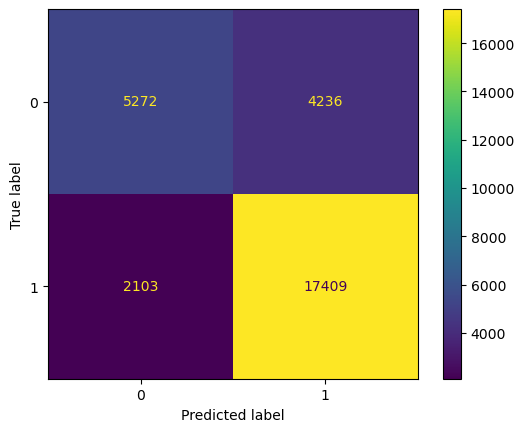

In [39]:
log_reg_model.score(x_train, y_train)
plot_confusion_matrix(log_reg_model , x_train, y_train)

In [18]:
y_pred_train = log_reg_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_train, y_pred_train)
print("Precision :",precision_value)

recall_value = recall_score(y_train, y_pred_train)
print('Recall :',recall_value)

f1_value = f1_score(y_train, y_pred_train)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[ 5468  4040]
 [ 2169 17343]]
**************************************************
Accuracy is : 0.7860441075120607
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      9508
           1       0.81      0.89      0.85     19512

    accuracy                           0.79     29020
   macro avg       0.76      0.73      0.74     29020
weighted avg       0.78      0.79      0.78     29020

**************************************************
Precision : 0.811064864612075
Recall : 0.8888376383763837
F1 Score: 0.8481721481843747
**************************************************


In [19]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.72      0.58      0.64      9508
           1       0.81      0.89      0.85     19512

    accuracy                           0.79     29020
   macro avg       0.76      0.73      0.74     29020
weighted avg       0.78      0.79      0.78     29020



In [20]:
y_pred = log_reg_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_test, y_pred)
print("Precision :",precision_value)

recall_value = recall_score(y_test, y_pred)
print('Recall :',recall_value)

f1_value = f1_score(y_test, y_pred)
print('F1 Score:',f1_value)
print("*"* 50)

Confusion Matrix :
 [[1396  981]
 [ 568 4310]]
**************************************************
Accuracy is : 0.7864920744314267
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.59      0.64      2377
           1       0.81      0.88      0.85      4878

    accuracy                           0.79      7255
   macro avg       0.76      0.74      0.75      7255
weighted avg       0.78      0.79      0.78      7255

**************************************************
Precision : 0.8145908145908146
Recall : 0.8835588355883559
F1 Score: 0.8476743042580392
**************************************************


In [21]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.71      0.59      0.64      2377
           1       0.81      0.88      0.85      4878

    accuracy                           0.79      7255
   macro avg       0.76      0.74      0.75      7255
weighted avg       0.78      0.79      0.78      7255



In [22]:
with open(r'artifacts/regression_model.pkl','wb') as f:
    pickle.dump(log_reg_model, f)

In [23]:
log_reg_model.n_features_in_

20

In [24]:
column_names = x.columns

project_data = {"Column Names" : column_names.tolist(),
                "room_type_reserved" : {'Room_Type 1': 1,
                                        'Room_Type 4': 4,
                                        'Room_Type 6': 6,
                                        'Room_Type 2': 2,
                                        'Room_Type 5': 5,
                                        'Room_Type 7': 7,
                                        'Room_Type 3': 3},
               "market_segment_type" :{'Online': 1,'Offline': 2,'Corporate': 3,'Complementary':4,'Aviation':5},
                'booking_status':{'Not_Canceled': 1, 'Canceled': 0}}

with open(r'artifacts/project_data.json','w') as f:
    json.dump(project_data, f)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64 
 2   no_of_children                        36275 non-null  int64 
 3   no_of_weekend_nights                  36275 non-null  int64 
 4   no_of_week_nights                     36275 non-null  int64 
 5   required_car_parking_space            36275 non-null  int64 
 6   room_type_reserved                    36275 non-null  int64 
 7   lead_time                             36275 non-null  int64 
 8   arrival_year                          36275 non-null  int64 
 9   arrival_month                         36275 non-null  int64 
 10  arrival_date                          36275 non-null  int64 
 11  market_segment_type         

In [25]:
std_scaler

StandardScaler()

In [26]:
std_scaler2

StandardScaler()

In [28]:
with open ('artifacts/std_scalar.pkl','wb') as f:
    pickle.dump(std_scaler2,f)